# Customer Value Simulation

In [1]:
import random as rd
import statistics as st
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
#input parameters
p_cancel = 0.20
profit_mean = 500.00
profit_std = 100.00

In [7]:
# user defined simulation function
# arguments: calls = number of phone calls, trials = number of simulation trials
# returns: list of simulated total donation amounts

def customervalue_sim(pr_cancel,trials):
    sample = []
    for i in range(trials):
        years = npr.geometric(p_cancel)
        tot_value = 0
        for year in range(years):
            tot_value = tot_value + rd.normalvariate(profit_mean,profit_std)
        sample.append(tot_value)
    return(sample)

Mean = 2443.03
St.Dev. = 2227.52


(array([544., 252., 114.,  49.,  23.,   6.,   7.,   2.,   0.,   3.]),
 array([  230.37363839,  1971.19853536,  3712.02343233,  5452.8483293 ,
         7193.67322627,  8934.49812324, 10675.32302021, 12416.14791718,
        14156.97281415, 15897.79771112, 17638.62260809]),
 <BarContainer object of 10 artists>)

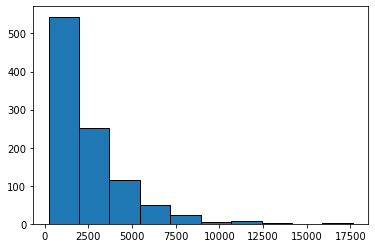

In [8]:
trials = 1000
sample = customervalue_sim(p_cancel,trials)
print('Mean = %5.2f' % st.mean(sample))
print('St.Dev. = %5.2f' % st.stdev(sample))
plt.hist(sample, edgecolor='k')

In [12]:
proportion = sum(1 for x in sample if x < 1500) / len(sample)
print('There is a %5.2f%% chance the value of a customer is less than $1,500.' % (100*proportion))

There is a 41.90% chance the value of a customer is less than $1,500.


In [13]:
# 90% confidence interval for the proportion
moe = 1.645 * (proportion * (1 - proportion) / len(sample)) ** 0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 90%% confidence interval for the probability of a customer value less than $1,500 is (%6.4f, %6.4f).' % (lcl,ucl))

The 90% confidence interval for the probability of a customer value less than $1,500 is (0.3933, 0.4447).


In [ ]:
sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
moe = 1.645 * sample_std / len(sample) ** 0.5
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 90%% confidence interval for the mean value of a customer is (%6.2f, %6.2f).' % (lcl,ucl))

In [23]:
# How does the mean customer value vary as the cancellation probability varies from 0.1 to 0.9

trials = 1000
p_cancel_lst = [p/100 for p in range(10,95,5)]
mean_value_lst = []
for p in p_cancel_lst:
    sample = customervalue_sim(p,trials)
    mean_value_lst.append(st.mean(sample))

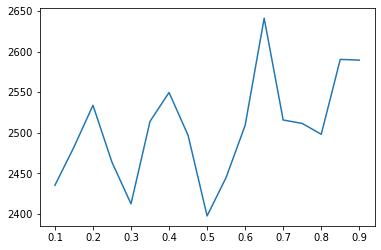

In [21]:
plt.plot(p_cancel_lst,mean_value_lst)